In [1]:
#Importacion de Librerias
import pandas as pd #Cargar DataSets
import numpy as np #Manejar arreglos numericos
import matplotlib.pyplot as plt #Generar graficas
import seaborn as sns #Generar graficas
from wordcloud import WordCloud #Generar nubes de palabras
from PIL import Image #Importacion y manejo de imagenes

# IMPORTANDO LOS DATOS

In [2]:
data = pd.read_excel("Reporte ms.xlsx")
data

,MICROSERVICIO,TIER,AREA,STATUS,AMBIENTES,VPN,EXPOSED
0,catalogue-migration,3,cpgs,in_production,"['dev', 'co', 'br', 'mx', 'ar', 'cl', 'pe', 'u...",False,True
1,rpp-contingency-ms,3,ComeRicoPay,in_production,['dev'],False,True
2,notify,2,growth,in_production,"['dev', 'co', 'br', 'mx', 'ar', 'cl', 'pe', 'u...",False,True
3,fishers-integration,2,restaurantes,in_production,"['dev', 'mx']",False,True
4,traefik-dynamodb,1,devops,in_production,-,False,True
...,...,...,...,...,...,...,...
2365,turbo-supply-ms,3,cargo,in_production,"['dev', 'co', 'br', 'mx', 'ar', 'cl', 'pe', 'u...",False,False
2366,krakend-httpcache,3,core,created,-,False,True
2367,shopper-events-ms,3,cpgs,in_production,"['dev', 'co', 'br', 'mx', 'ar', 'cl', 'pe', 'u...",False,True
2368,rest-ops-la-history,3,restaurantes,in_production,"['dev', 'co', 'br', 'mx', 'ar', 'cl', 'pe', 'u...",True,False


In [3]:
#False False revisar si hay mas datos y quitarlos
#Ambientes y Exposed No usar

---------

## Eliminando columnas de ambiente y Exposed ya que no contienen informacion relevante

In [4]:
data = data.drop(["AMBIENTES", "EXPOSED"], axis=1) #Se eliminan las correspondientes columnas. axis refiere a eliminar de manera vertical

In [5]:
data.head(3)

,MICROSERVICIO,TIER,AREA,STATUS,VPN
0,catalogue-migration,3,cpgs,in_production,False
1,rpp-contingency-ms,3,ComeRicoPay,in_production,False
2,notify,2,growth,in_production,False


### Explorando los datos

In [6]:
#Explorando las variables y sus posibles valores

#data["MICROSERVICIO"].value_counts() #Cada MS se repite una unica vez
#data["TIER"].value_counts() #3 categorias
#data["AREA"].value_counts() #Aprox 20 categorias
#data["STATUS"].value_counts() #4 Categorias
#data["VPN"].value_counts() #2 categorias

-----------

## Areas por TIER

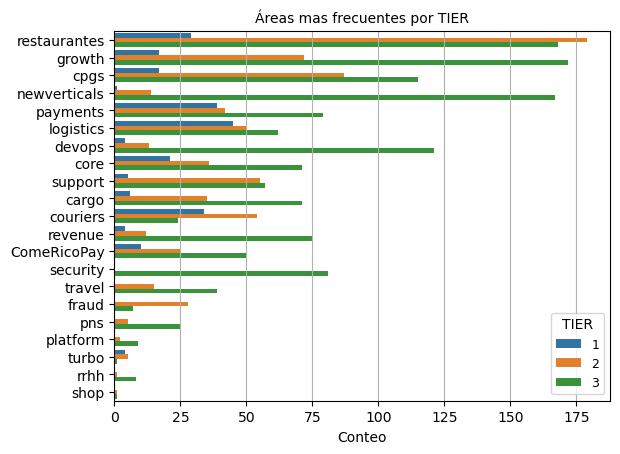

In [7]:
sns.countplot(y="AREA", data=data, 
              order = data["AREA"].value_counts().index, hue="TIER")
sns.set_palette("Set2")
plt.title("Áreas mas frecuentes por TIER",fontsize="10")
plt.xlabel("Conteo")
plt.ylabel(None)
plt.legend(title="TIER", loc="lower right", fontsize="9")
plt.grid(axis="x")
plt.show()

------------

## AREAS POR STATUS

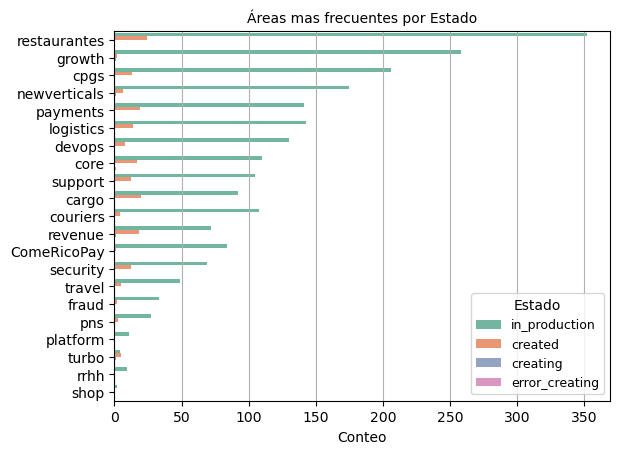

In [8]:
sns.countplot(y="AREA", data=data, 
              order = data["AREA"].value_counts().index, hue="STATUS")
sns.set_palette("Set2")
plt.title("Áreas mas frecuentes por Estado",fontsize="10")
plt.xlabel("Conteo")
plt.ylabel(None)
plt.legend(title="Estado", loc="lower right", fontsize="9")
plt.grid(axis="x")
plt.show()

-------------

## Areas segun VPN

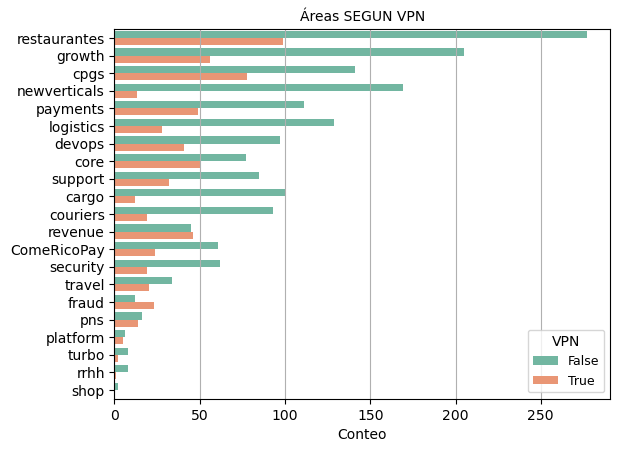

In [9]:
sns.countplot(y="AREA", data=data, 
              order = data["AREA"].value_counts().index, hue="VPN")
sns.set_palette("Set1")
plt.title("Áreas SEGUN VPN",fontsize="10")
plt.xlabel("Conteo")
plt.ylabel(None)
plt.legend(title="VPN", loc="lower right", fontsize="9")
plt.grid(axis="x")
plt.show()

---------

## Status por VPN y TIER

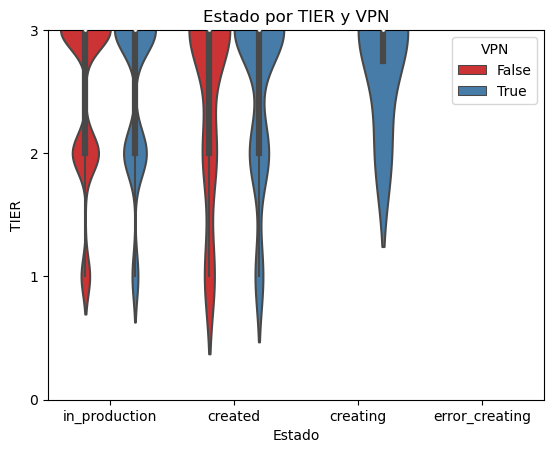

In [10]:
sns.violinplot(data=data, x="STATUS", y="TIER",
              order = data["STATUS"].value_counts().index, hue="VPN")
plt.title("Estado por TIER y VPN")
plt.xlabel("Estado")
sns.set_palette("Set1")
plt.ylim(1,2)
plt.ylabel("TIER")
plt.yticks(np.arange(0, 4, 1))
plt.show()

------------

In [11]:
data.head()

,MICROSERVICIO,TIER,AREA,STATUS,VPN
0,catalogue-migration,3,cpgs,in_production,False
1,rpp-contingency-ms,3,ComeRicoPay,in_production,False
2,notify,2,growth,in_production,False
3,fishers-integration,2,restaurantes,in_production,False
4,traefik-dynamodb,1,devops,in_production,False


## Nube de Palabras Microservicios

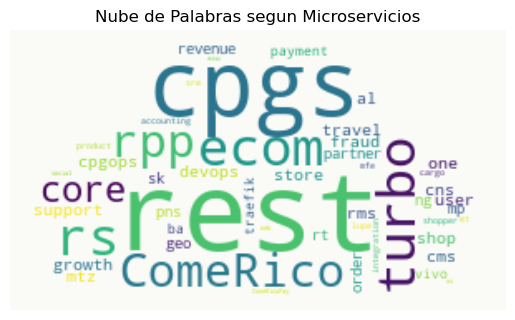

In [14]:
mask = np.array(Image.open("nube de palabras.png")) #Mascara de la forma
mask[mask == 1] = 255 #Señalar los pixeles negros

#Texto a Analizar
text = " ".join(item.split(sep="-")[0] for item in data.MICROSERVICIO) #Unir todas las palabras en una unica cadena de texto

#Creando la nube
exclure_mots=[""] #Palabras a excluir #IMPORTANTE
word_cloud = WordCloud(collocations = False, background_color="#FAFAF7", max_words=50, stopwords = exclure_mots,
                      mask=mask, repeat=True).generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation="bilinear")
plt.title("Nube de Palabras segun Microservicios")
plt.axis("off")
plt.show() #Solo muestra la imagen sin las cadenas de texto que se generan con labels